
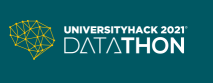


# Reto Cajamar Agro Analysis


## ÍNDICE DE DATASETS:
* [1. Librerías y Carga de Datos](#librerias-datos)
* [2. Consumo de Frutas y Hortalizas por Comunidades Autónomas](#consumo-ccaa)
* [3. Precios de Frutas y Hortalizas en Andalucía](#precios-and)
* [4. Datos de MercaMadrid y MercaBarna ](#merca-bcnmad)
* [5. Comercio Exterior entre países de la Unión Europea y España](#com-esp)
* [6. Dataset COVID-19](#covid19-ue)

## 1. Librerías y Carga de Datos <a class="anchor" id="librerias-datos"></a>

In [1]:
import pandas as pd
import numpy as np
import glob
import datetime as dt
import locale
import warnings
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Todos los datasets se guardan en variables

df_consumoCCAA =pd.read_csv("Dataset1.- DatosConsumoAlimentarioMAPAporCCAA.txt", sep="|", encoding = "utf-8")
df_PreciosAnd = pd.read_csv("Dataset2.- Precios Semanales Observatorio de Precios Junta de Andalucia.txt",sep="|", encoding = "utf-8")
mercaMadrid = pd.read_csv("Dataset3a_Datos_MercaMadrid.txt",sep="|", encoding = "utf-8")
mercaBarna = pd.read_csv("Dataset3b_Datos_MercaBarna.txt",sep="|", encoding = "utf-8")
df_comercioEXT = pd.read_csv("Dataset4.- Comercio Exterior de España.txt",sep="|", encoding = "utf-8")
covid19Datos = pd.read_csv("Dataset5_Coronavirus_cases.txt",sep="|", encoding = "utf-8")

## 2. Consumo de Frutas y Hortalizas por Comunidades Autónomas (2018,2019,2020) <a class="anchor" id="consumo-ccaa"></a>

In [2]:
df_consumoCCAA.head(5)

,Año,Mes,CCAA,Producto,Volumen (miles de kg),Valor (miles de €),Precio medio kg,Penetración (%),Consumo per capita,Gasto per capita,Unnamed: 10,Unnamed: 11
0,2018,Enero,Total Nacional,TOTAL PATATAS,"108430,72","84640,08","0,78","79,4","2,38","1,85",NaN,NaN
1,2018,Enero,Total Nacional,PATATAS FRESCAS,"79445,66","54688,29","0,69","68,46","1,74","1,2",NaN,NaN
2,2018,Enero,Total Nacional,PATATAS CONGELADAS,"3999,9","4857,79","1,21","12,06","0,09","0,11",NaN,NaN
3,2018,Enero,Total Nacional,PATATAS PROCESADAS,"4997,03",25094,"5,02","45,94","0,11","0,55",NaN,NaN
4,2018,Enero,Total Nacional,T.HORTALIZAS FRESCAS,"209957,24","376688,56","1,79","97,27","4,6","8,25",NaN,NaN


In [3]:
##Borramos estas dos columnas al estar null en su totalidad
df_consumoCCAA.drop(columns=['Unnamed: 10','Unnamed: 11'],axis=1, inplace=True)

## Se rellenan los valores NaN de la columna de penetración con un 0
df_consumoCCAA['Penetración (%)'] = df_consumoCCAA['Penetración (%)'].fillna('0')

## Se pasan los valores numéricos de string a float 
df_consumoCCAA[['Volumen (miles de kg)','Valor (miles de €)','Precio medio kg','Consumo per capita','Gasto per capita','Penetración (%)']]= df_consumoCCAA[['Volumen (miles de kg)','Valor (miles de €)','Precio medio kg','Consumo per capita','Gasto per capita','Penetración (%)']].applymap(lambda x: x.replace(',','.')).astype(float)

## Se crea la columna fecha en base a la columna año y mes (hay que transformar el nombre del mes a número)
lista_mes= ['Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre']
mask = df_consumoCCAA['Mes'].isin(lista_mes)
df_consumo_comunidades = df_consumoCCAA[mask]
df_consumo_comunidades['Mes'] = pd.to_datetime(df_consumo_comunidades['Mes'], format='%B').dt.month
df_consumo_comunidades['Fecha'] =  pd.to_datetime(df_consumo_comunidades['Año'].map(str) + '-' + df_consumo_comunidades['Mes'].map(str)).dt.strftime('%m-%Y')
df_consumo_comunidades.set_index('Fecha',inplace=True)
df_consumo_comunidades.head(10)

# Guardamos el dataset limpio en formato .CSV y con un encoding correcto
#df_consumo_comunidades.to_csv("consumoF&H_Limpio.csv", encoding = 'utf-8-sig')

,Año,Mes,CCAA,Producto,Volumen (miles de kg),Valor (miles de €),Precio medio kg,Penetración (%),Consumo per capita,Gasto per capita
Fecha,,,,,,,,,,
03-2018,2018,3,Total Nacional,TOTAL PATATAS,111978.64,92382.14,0.82,80.93,2.45,2.02
03-2018,2018,3,Total Nacional,PATATAS FRESCAS,79299.74,56112.25,0.71,66.89,1.74,1.23
03-2018,2018,3,Total Nacional,PATATAS CONGELADAS,4270.74,5386.51,1.26,12.95,0.09,0.12
03-2018,2018,3,Total Nacional,PATATAS PROCESADAS,5681.63,30883.38,5.44,49.72,0.12,0.68
03-2018,2018,3,Total Nacional,T.HORTALIZAS FRESCAS,221895.39,401447.35,1.81,96.84,4.86,8.80
03-2018,2018,3,Total Nacional,TOMATES,43479.81,69575.29,1.60,79.13,0.95,1.52
03-2018,2018,3,Total Nacional,CEBOLLAS,27461.40,29958.02,1.09,69.58,0.60,0.66
03-2018,2018,3,Total Nacional,AJOS,2990.09,12276.59,4.11,39.63,0.07,0.27
03-2018,2018,3,Total Nacional,COLES,6138.42,6880.82,1.12,21.96,0.13,0.15


## 3. Precios de Frutas y Hortalizas en Andalucía <a class="anchor" id="precios-and"></a>

In [4]:
df_PreciosAnd

,INICIO,FIN,GRUPO,SECTOR,SUBSECTOR,PRODUCTO,TIPO,SUBTIPO,POSICION,CATEGORIA,FORMATO,PRECIO,UNIDAD
0,01/01/2018,07/01/2018,Agrícola,Frutales,Citricos,LIMON,NaN,NaN,Mercas,NaN,NaN,"0,92",Euros/kg
1,01/01/2018,07/01/2018,Agrícola,Frutales,Citricos,MANDARINA,NaN,NaN,Mercas,NaN,NaN,"0,84",Euros/kg
2,01/01/2018,07/01/2018,Agrícola,Frutales,Citricos,NARANJA,NaN,NaN,Mercas,NaN,NaN,"0,78",Euros/kg
3,01/01/2018,07/01/2018,Agrícola,Frutales,Citricos,POMELO,NaN,NaN,Mercas,NaN,NaN,"1,01",Euros/kg
4,01/01/2018,07/01/2018,Agrícola,Frutales,Frutales no cítricos,AGUACATE,NaN,NaN,Mercas,NaN,NaN,"3,77",Euros/kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19402,23/11/2020,29/11/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),RAMA (ECO),SIN ESPECIFICAR (ECO),Agricultor,NaN,NaN,"0,65",Euros/kg
19403,23/11/2020,29/11/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),REDONDO (ECO),SIN ESPECIFICAR (ECO),Agricultor,NaN,NaN,"0,42",Euros/kg
19404,23/11/2020,29/11/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),TIPO CHERRY (ECO),PERA SUELTO ROJO (ECO),Agricultor,NaN,NaN,1,Euros/kg
19405,23/11/2020,29/11/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),TIPO CHERRY (ECO),REDONDO RAMA ROJO (ECO),Agricultor,NaN,NaN,"1,24",Euros/kg


In [5]:
# Se borra la columna formato debido a su gran cantidad de nulls ya que no aporta información relevante
df_PreciosAnd.drop(columns=['FORMATO'],axis=1, inplace=True)

# Se quita la columna categoría porque no aporta información relevante
df_PreciosAnd.drop(columns= ['CATEGORIA'], inplace=True)

# Rellenar las columnas que tienen NaN y modificar las que tienen 'NO DESIGNADO' con 'SIN ESPECIFICAR' para homogeneizar los datos
df_PreciosAnd[['TIPO','SUBTIPO']] = df_PreciosAnd[['TIPO','SUBTIPO']].fillna('SIN ESPECIFICAR')
df_PreciosAnd =  df_PreciosAnd.applymap(lambda x: str(x.replace('NO DESIGNADO','SIN ESPECIFICAR')))

# Pasar las columnas Inicio y Fin a datetime
df_PreciosAnd['INICIO']= pd.to_datetime(df_PreciosAnd['INICIO'])
df_PreciosAnd['FIN']= pd.to_datetime(df_PreciosAnd['FIN'])

# Pasar los valores numéricos de string a float
df_PreciosAnd['PRECIO'] = df_PreciosAnd['PRECIO'].apply(lambda x: str(x.replace(',','.')))
df_PreciosAnd['PRECIO']= df_PreciosAnd['PRECIO'].astype(float)

# Guardamos el Dataset limpio de los precios de Andalucía.
#df_PreciosAnd.to_csv("preciosAndalucia_Limpio.csv", encoding = 'utf-8-sig',index_label = False)

## 4. Datos de MercaMadrid y MercaBarna <a class="anchor" id="merca-bcnmad"></a>

In [6]:
#### Limpieza de MercaBarna

## Reemplazo de strings por falta de encoding en el dataset original

mercaBarna['product'] = mercaBarna['product'].replace('CASTAÃ\x91AS','CASTAÑAS')
mercaBarna['product'] = mercaBarna['product'].replace('CHAMPIÃ\x91ON','CHAMPIÑON')
mercaBarna['product'] = mercaBarna['product'].replace('CASTAÃ\x91AS','CASTAÑAS')
mercaBarna['product'] = mercaBarna['product'].replace('Ã\x91AME O YAME','YAME')
mercaBarna['product'] = mercaBarna['product'].replace('CAÃ\x91A DE AZÃ\x9aCAR','CAÑA DE AZUCAR')
mercaBarna['product'] = mercaBarna['product'].replace('CALÃ\x87OTS','CALÇOTS')
mercaBarna['product'] = mercaBarna['product'].replace('CALABACÃ\x8dN','CALABACIN')
mercaBarna['product'] = mercaBarna['product'].replace('CHAMPIÃ\x91ONES','CHAMPIÑONES')
mercaBarna['product'] = mercaBarna['product'].replace('CHIRIVÃ\x8dA','CHIRIVIA')
mercaBarna['product'] = mercaBarna['product'].replace('GÃ\x8dRGOLAS','GIRGOLAS')
mercaBarna['product'] = mercaBarna['product'].replace('MAÃ\x8dZ','MAIZ')
mercaBarna['product'] = mercaBarna['product'].replace('BRÃ\x93CULI','BROCULI')
mercaBarna['product'] = mercaBarna['product'].replace('BRÃ\x89COL','BROCOL')
mercaBarna['product'] = mercaBarna['product'].replace('ENDÃ\x8dBIAS','ENDIBIAS')
mercaBarna['product'] = mercaBarna['product'].replace('ESPÃ\x81RRAGO BLANCO','ESPARRAGO BLANCO')
mercaBarna['product'] = mercaBarna['product'].replace('ESPÃ\x81RRAGO VERDE','ESPARRAGO VERDE')
mercaBarna['product'] = mercaBarna['product'].replace('FRUTAS DÃ\x81TILES','DATILES')
mercaBarna['product'] = mercaBarna['product'].replace('FRUTAS FRESÃ\x93N','FRUTAS FRESON')
mercaBarna['product'] = mercaBarna['product'].replace('FRUTAS MELÃ\x93N AMARILLO','FRUTAS MELON AMARILLO')
mercaBarna['product'] = mercaBarna['product'].replace('FRUTAS MELÃ\x93N GALIA','FRUTAS MELON GALIA')
mercaBarna['product'] = mercaBarna['product'].replace('FRUTAS MELÃ\x93N SIN DETERMINAR','FRUTAS MELON SIN DETERMINAR')
mercaBarna['product'] = mercaBarna['product'].replace('FRUTAS MELÃ\x93N VERDE PIEL DE SAPO','FRUTAS MELON VERDE PIEL DE SAPO')
mercaBarna['product'] = mercaBarna['product'].replace('FRUTAS PIÃ\x91A TROPICAL','FRUTAS PIÑA TROPICAL')
mercaBarna['product'] = mercaBarna['product'].replace('FRUTAS PLÃ\x81TANOS CANARIOS','FRUTAS PLATANOS CANARIOS')
mercaBarna['product'] = mercaBarna['product'].replace('FRUTAS PLÃ\x81TANOS IMPORTACIÃ\x93N','FRUTAS PLATANOS IMPORTACION')
mercaBarna['product'] = mercaBarna['product'].replace('FRUTAS SANDÃ\x8dA CON GRANA','FRUTAS SANDIA CON GRANA')
mercaBarna['product'] = mercaBarna['product'].replace('FRUTAS SANDÃ\x8dA SIN GRANA','FRUTAS SANDIA SIN GRANA')
mercaBarna['product'] = mercaBarna['product'].replace('JUDÃ\x8dA BOBI','JUDIA BOBI')
mercaBarna['product'] = mercaBarna['product'].replace('JUDÃ\x8dA FINA','JUDIA FINA')
mercaBarna['product'] = mercaBarna['product'].replace('JUDÃ\x8dA PERONA','JUDIA PERONA')
mercaBarna['product'] = mercaBarna['product'].replace('JUDÃ\x8dAS SIN DETERMINAR','JUDIAS SIN DETERMINAR')
mercaBarna['product'] = mercaBarna['product'].replace('LIMÃ\x93N','LIMON')
mercaBarna['product'] = mercaBarna['product'].replace('MARACUYÃ\x81','MARACUYA')
mercaBarna['product'] = mercaBarna['product'].replace('MELOCOTÃ\x93N AMARILLO','MELOCOTON AMARILLO')
mercaBarna['product'] = mercaBarna['product'].replace('MELOCOTÃ\x93N ROJO P.BLANCA','MELOCOTON ROJO P.BLANCA')
mercaBarna['product'] = mercaBarna['product'].replace('NÃ\x8dSPERO','NISPERO')
mercaBarna['product'] = mercaBarna['product'].replace('RAMBUTÃ\x81N','RAMBUTAN')
mercaBarna['product'] = mercaBarna['product'].replace('RÃ\x81BANOS','RABANOS')
mercaBarna['product'] = mercaBarna['product'].replace('SECO CASTAÃ\x91AS','SECO CASTAÑAS')
mercaBarna['familia'] = mercaBarna['familia'].replace('HORTALIZAS TUBÃ\x89RCULO','HORTALIZAS TUBERCULO')
mercaBarna['familia'] = mercaBarna['familia'].replace('FRUTAS EXÃ\x93TICAS','FRUTAS EXOTICAS')
mercaBarna['familia'] = mercaBarna['familia'].replace('HORTALIZAS RAÃ\x8dZ','HORTALIZAS RAIZ')
mercaBarna['familia'] = mercaBarna['familia'].replace('FRUTAS CÃ\x8dTRICOS','FRUTAS CITRICOS')

## Sustituimos las comas por puntos y pasamos las columnas de precios y volumen a float
mercaBarna['price_mean'] = mercaBarna['price_mean'].apply(lambda x: x.replace(',','.'))
mercaBarna[['price_mean','Volumen']] = mercaBarna[['price_mean','Volumen']].astype(float)

## Calculamos una columna nueva que nos servirá para el análisis posterior. En este caso el valor de cada operación
mercaBarna['Valor (en euros)'] = mercaBarna["price_mean"] * mercaBarna["Volumen"]
mercaBarna = mercaBarna[mercaBarna['Valor (en euros)'] > 0]

## Creamos una nueva columna y formateamos la fecha para representar series temporales en graficas
mercaBarna['DATE'] = pd.to_datetime(mercaBarna[['YEAR', 'MONTH']].assign(DAY=1))
mercaBarna['DATE']= pd.to_datetime(mercaBarna['DATE'], format='%m/%y')
mercaBarna.drop(['YEAR','MONTH'],axis=1 , inplace=True)

## Guardamos el dataset de mercaBarna ya limpio para su posterior uso
#mercaBarna.to_csv('mercaBarna_Limpio.csv',index=False,header=True, sep=',',encoding = 'utf-8-sig')


In [7]:
#### Limpieza de MercaMadrid

## Reemplazo de strings por falta de encoding en el dataset original
mercaMadrid['product'] = mercaMadrid['product'].replace('CASTAÃ\x91AS','CASTAÑAS')
mercaMadrid['product'] = mercaMadrid['product'].replace('CHAMPIÃ\x91ON','CHAMPIÑON')
mercaMadrid['product'] = mercaMadrid['product'].replace('Ã\x91AME O YAME','YAME')
mercaMadrid['product'] = mercaMadrid['product'].replace('CAÃ\x91A DE AZUCAR','CAÑA DE AZUCAR')
mercaMadrid['product'] = mercaMadrid['product'].replace('PIÃ\x91AS','PIÑA')

## Sustituimos las comas por puntos y pasamos las columnas de precios y volumen a float
mercaMadrid[['price_mean','price_max','price_min']]= mercaMadrid[['price_mean','price_max','price_min']].apply(lambda x: x.str.replace(',','.'))
mercaMadrid[['price_mean','price_max','price_min','Volumen']]= mercaMadrid[['price_mean','price_max','price_min','Volumen']].astype(float)

## Calculamos una columna nueva que nos servirá para el análisis posterior. En este caso el valor de cada operación
mercaMadrid['Valor (en euros)'] = mercaMadrid['price_mean'] * mercaMadrid['Volumen']
mercaMadrid = mercaMadrid[mercaMadrid['Valor (en euros)'] > 0]

## Creamos una nueva columna y formateamos la fecha para representar series temporales en graficas
mercaMadrid['DATE'] = pd.to_datetime(mercaMadrid[['YEAR', 'MONTH']].assign(DAY=1))
mercaMadrid['DATE']= mercaMadrid['DATE'].dt.strftime('%m/%Y')
mercaMadrid['DATE'] = pd.to_datetime(mercaMadrid['DATE'])
mercaMadrid.drop(['YEAR','MONTH','variedad'],axis=1 , inplace=True)

## Guardamos el dataset de mercaMadrid ya limpio para su posterior uso
#mercaMadrid.to_csv('mercaMadrid_Limpio.csv',index=False,header=True, sep=',',encoding = 'utf-8-sig')

## 5. Comercio Exterior entre países de la Unión Europea y España <a class="anchor" id="com-esp"></a>

In [8]:
## Reemplazamos los valores de la columna reporter para que sea mas sencillo de leer
df_comercioEXT['REPORTER'] = df_comercioEXT['REPORTER'].replace('European Union - 27 countries (AT, BE, BG, CY, CZ, DE, DK, EE, ES, FI, FR, GR, HR, HU, IE, IT, LT, LU, LV, MT, NL, PL, PT, RO, SE, SI, SK)','EU27')
df_comercioEXT['REPORTER'] = df_comercioEXT['REPORTER'].replace("France (incl. Saint Barthélemy 'BL' -> 2012| incl. French Guiana 'GF', Guadeloupe 'GP', Martinique 'MQ', Réunion 'RE' from 1997| incl. Mayotte 'YT' from 2014)",'France')
df_comercioEXT['REPORTER'] = df_comercioEXT['REPORTER'].replace("Spain (incl. Canary Islands 'XB' from 1997)",'Spain')
df_comercioEXT['REPORTER'] = df_comercioEXT['REPORTER'].replace("Italy (incl. San Marino 'SM' -> 1993)",'Italy')
df_comercioEXT['REPORTER'] = df_comercioEXT['REPORTER'].replace("Germany (incl. German Democratic Republic 'DD' from 1991)",'Germany')
df_comercioEXT['REPORTER'] = df_comercioEXT['REPORTER'].replace("Belgium (incl. Luxembourg 'LU' -> 1998)",'Belgium')
df_comercioEXT['REPORTER'] = df_comercioEXT['REPORTER'].replace('')

## Deshechamos los periodos de 12 meses ya que el de 2020 está incompleto. Quedándonos con una periocidad mensual para 2018,2019,2020
lista = list(df_comercioEXT['PERIOD'].unique())
lista.pop(12)
lista.pop(24)
lista.pop(36)

## Limpiamos valores extraños de la columna value y la pasamos a float 
df_comercioEXT = df_comercioEXT[df_comercioEXT['Value'] != ':']
df_comercioEXT['Value'] = df_comercioEXT['Value'].str.replace(' ', '')
df_comercioEXT['Value'] = df_comercioEXT['Value'].astype(float)
## Establecemos una perioicidad mensual y pasamos la columna a datetime
df_comercioEXT = df_comercioEXT[df_comercioEXT['PERIOD'].isin(lista)]
df_comercioEXT['PERIOD'] = df_comercioEXT['PERIOD'].str.replace('. ', '-')
df_comercioEXT['PERIOD'] = pd.to_datetime(df_comercioEXT['PERIOD']).dt.strftime('%m-%Y')

## Agrupamos por las siguientes columnas para calcular el sumatorio del value
comercio_grouped = pd.DataFrame(df_comercioEXT.groupby(['REPORTER','PERIOD','FLOW','INDICATORS','PRODUCT'], as_index=False)['Value'].sum())
comercio_grouped = comercio_grouped[comercio_grouped['Value'] > 0]

## Guardamos el dataset de comercio exterior limpio para el análisi posterior
#comercio_grouped.to_csv('comercioExterior_Limpio.csv',index=False,header=True,sep=',',encoding='utf-8-sig')

## 6. Dataset COVID-19 <a class="anchor" id="covid19-ue"></a>

In [9]:
## Filtramos el dataset a sólo los paises de interés, que en este caso son los de la unión europea.
lista_ue = ['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Estonia', 'Spain', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia']
covid19Datos = covid19Datos[covid19Datos['countriesAndTerritories'].isin(lista_ue)]
covid19Datos = covid19Datos.dropna(axis='rows')

## Cambiamos comas por puntos y se deja valores por encima de cero.
covid19Datos['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] = covid19Datos['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].str.replace(',','.')
covid19Datos['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] = covid19Datos['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].astype(float)
covid19Datos = covid19Datos[covid19Datos['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] > 0]

## Guardamos el dataset una vez limpio para su uso en los análisis del caso
#covid19Datos.to_csv('covid19Datos_EU.csv',header=True, index=False, sep=',', encoding='utf-8-sig')